In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
original_df=pd.read_csv('D:\Git -ClassActivities\GenZ\data\GenZ_DatingApp_Data.csv')
df=original_df.copy()
df

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,23,Female,Mumbai,Undergraduate,Intern,Tinder,Hinge,Weekly,1.5 hours,Casual Dating,2,NaN,Audio Calls,Voice Notes,Personality > Interests > Values
496,497,23,Male,Mumbai,Postgraduate,Intern,OkCupid,Tinder,Daily,2 hours,Casual Fun,1,Time-Wasting,Video Calls,Video Calls,Values > Personality > Appearance
497,498,22,Male,Hyderabad,Graduate,Freelancer,NaN,Hinge,Monthly,2 hours,Casual Fun,2,Lack of Genuine Matches,Video Calls,Voice Notes,Appearance > Interests > Personality
498,499,21,Female,Kolkata,Graduate,Student,Tinder,Hinge,Daily,1.5 hours,Casual Dating,3,Lack of Genuine Matches,Detailed Profiles,Text,Appearance > Interests > Personality


TASK 1

In [10]:
df.duplicated().sum() 
#There are no duplicated rows

np.int64(0)

In [27]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64

There are missing values in 3 columns, thus - Primary_App  ,Secondary_Apps and Challenges

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

All objects need to be converted to their appropriate datatypes

In [30]:
objects=df.select_dtypes(include='object')
objects

,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,Mumbai,Undergraduate,Intern,Tinder,Hinge,Weekly,1.5 hours,Casual Dating,NaN,Audio Calls,Voice Notes,Personality > Interests > Values
496,Male,Mumbai,Postgraduate,Intern,OkCupid,Tinder,Daily,2 hours,Casual Fun,Time-Wasting,Video Calls,Video Calls,Values > Personality > Appearance
497,Male,Hyderabad,Graduate,Freelancer,NaN,Hinge,Monthly,2 hours,Casual Fun,Lack of Genuine Matches,Video Calls,Voice Notes,Appearance > Interests > Personality
498,Female,Kolkata,Graduate,Student,Tinder,Hinge,Daily,1.5 hours,Casual Dating,Lack of Genuine Matches,Detailed Profiles,Text,Appearance > Interests > Personality


In [31]:
for col in objects.columns:
    df[col]=df[col].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              393 non-null    category
 7   Secondary_Apps           386 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    int64   
 12  Challenges               383 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [36]:
categorical_cols = df.select_dtypes(include=['category']).columns
categorical_cols



Index(['Gender', 'Location', 'Education', 'Occupation', 'Primary_App',
       'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')

In [41]:
# Check unique values in each categorical column
for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n", df[col].unique())


Unique values in 'Gender':
 ['Non-binary', 'Female', 'Male']
Categories (3, object): ['Female', 'Male', 'Non-binary']

Unique values in 'Location':
 ['Bangalore', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai', 'Pune', 'Hyderabad']
Categories (7, object): ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']

Unique values in 'Education':
 ['Undergraduate', 'Graduate', 'Postgraduate']
Categories (3, object): ['Graduate', 'Postgraduate', 'Undergraduate']

Unique values in 'Occupation':
 ['Freelancer', 'Part-time Job', 'Intern', 'Full-time Job', 'Student']
Categories (5, object): ['Freelancer', 'Full-time Job', 'Intern', 'Part-time Job', 'Student']

Unique values in 'Primary_App':
 ['Hinge', NaN, 'OkCupid', 'Tinder', 'Bumble']
Categories (4, object): ['Bumble', 'Hinge', 'OkCupid', 'Tinder']

Unique values in 'Secondary_Apps':
 ['Hinge', 'OkCupid', NaN, 'Tinder', 'Bumble']
Categories (4, object): ['Bumble', 'Hinge', 'OkCupid', 'Tinder']

Unique values in 'Usage_Frequency':

 No sensitivity issues or inconsistencies

In [42]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)


Numerical Columns: Index(['User_ID', 'Age', 'Satisfaction'], dtype='object')


In [44]:
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

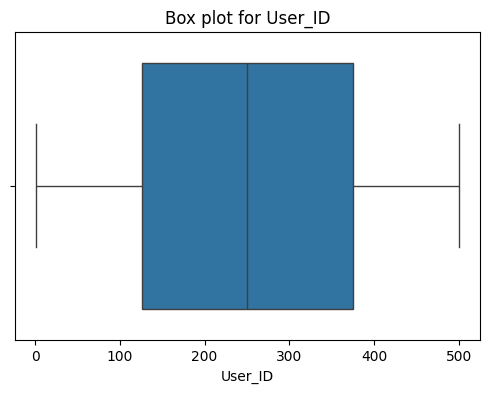

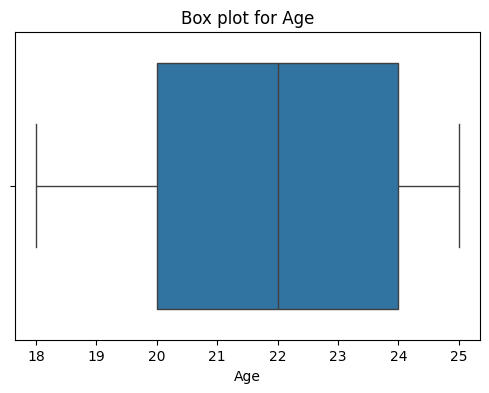

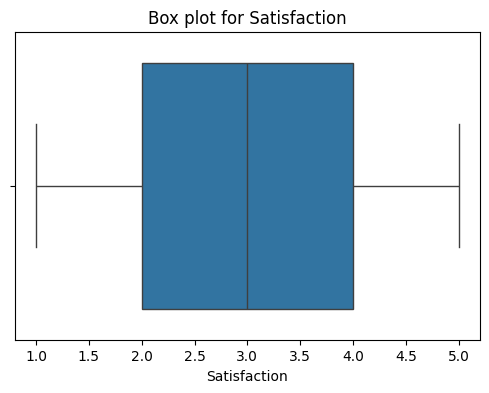

In [45]:
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot for {col}")
    plt.show()


In [46]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check outliers for each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in '{col}':\n", outliers)


Outliers in 'User_ID':
 Empty DataFrame
Columns: [User_ID, Age, Gender, Location, Education, Occupation, Primary_App, Secondary_Apps, Usage_Frequency, Daily_Usage_Time, Reason_for_Using, Satisfaction, Challenges, Desired_Features, Preferred_Communication, Partner_Priorities]
Index: []
Outliers in 'Age':
 Empty DataFrame
Columns: [User_ID, Age, Gender, Location, Education, Occupation, Primary_App, Secondary_Apps, Usage_Frequency, Daily_Usage_Time, Reason_for_Using, Satisfaction, Challenges, Desired_Features, Preferred_Communication, Partner_Priorities]
Index: []
Outliers in 'Satisfaction':
 Empty DataFrame
Columns: [User_ID, Age, Gender, Location, Education, Occupation, Primary_App, Secondary_Apps, Usage_Frequency, Daily_Usage_Time, Reason_for_Using, Satisfaction, Challenges, Desired_Features, Preferred_Communication, Partner_Priorities]
Index: []


In [48]:
df['Primary_App'].value_counts()

Primary_App
OkCupid    118
Hinge      106
Bumble      93
Tinder      76
Name: count, dtype: int64

In [51]:
df['Primary_App'] =df['Primary_App'].fillna(df['Primary_App'].mode()[0])

In [52]:
df['Secondary_Apps'] =df['Secondary_Apps'].fillna(df['Secondary_Apps'].mode()[0])

In [53]:
df['Challenges'] =df['Challenges'].fillna(df['Challenges'].mode()[0])

In [54]:
df.isnull().sum()

User_ID                    0
Age                        0
Gender                     0
Location                   0
Education                  0
Occupation                 0
Primary_App                0
Secondary_Apps             0
Usage_Frequency            0
Daily_Usage_Time           0
Reason_for_Using           0
Satisfaction               0
Challenges                 0
Desired_Features           0
Preferred_Communication    0
Partner_Priorities         0
dtype: int64